In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_sch

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.dpi"] = 150

In [18]:
dummy_module = nn.Parameter(torch.zeros(1))
schedulers = [
    lr_sch.CosineAnnealingLR(
        optim.AdamW([dummy_module], lr=1), T_max=100, eta_min=1e-7
    ),
    lr_sch.CosineAnnealingWarmRestarts(
        optim.AdamW([dummy_module], lr=1), T_0=3, T_mult=33, eta_min=1e-7
    ),
]

all_lrs = [[] for _ in schedulers]

for step in range(100):
    for i, scheduler in enumerate(schedulers):
        scheduler.step()
        all_lrs[i].append(scheduler.optimizer.param_groups[0]["lr"])

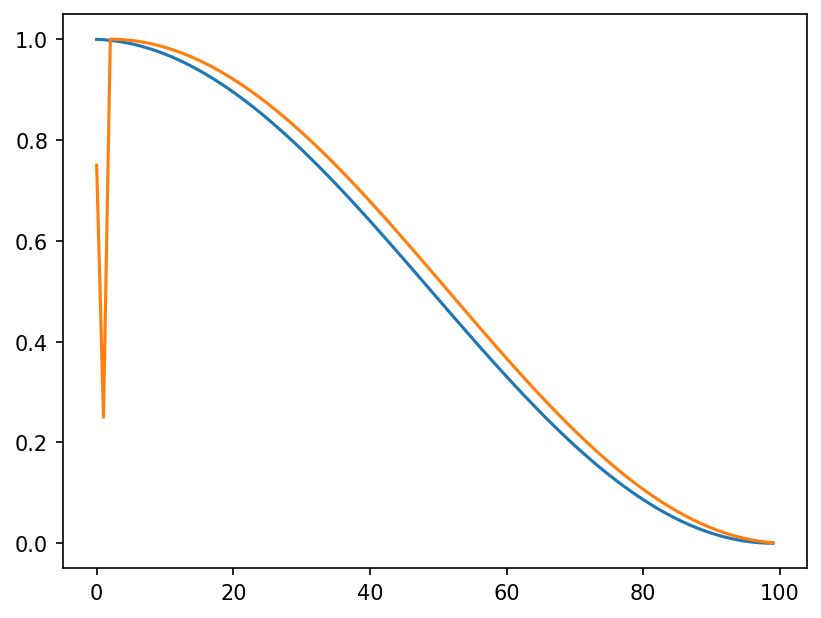

In [19]:
for lr in all_lrs:
    plt.plot(lr)
plt.show()